<a href="https://colab.research.google.com/github/erobrien6/OBrien_DSPN_S23/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [31]:
# Manually uploaded data to colab due to working directory error
df_exercise7 <- read.csv("/content/unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(df_exercise7)

library(tidyverse)
d1 <- df_exercise7 %>%
  select(c('Subject', 'Gender', 'Flanker_Unadj', 'FS_Tot_WM_Vol', 'FS_Total_GM_Vol'))
# Remove NA values
na.omit(d1)
head(d1)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024
9,101309,M,113.67,491221,707674
10,101410,M,108.46,502143,773472
12,101915,F,98.94,405886,676282


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100004,M,121.97,NA,NA
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

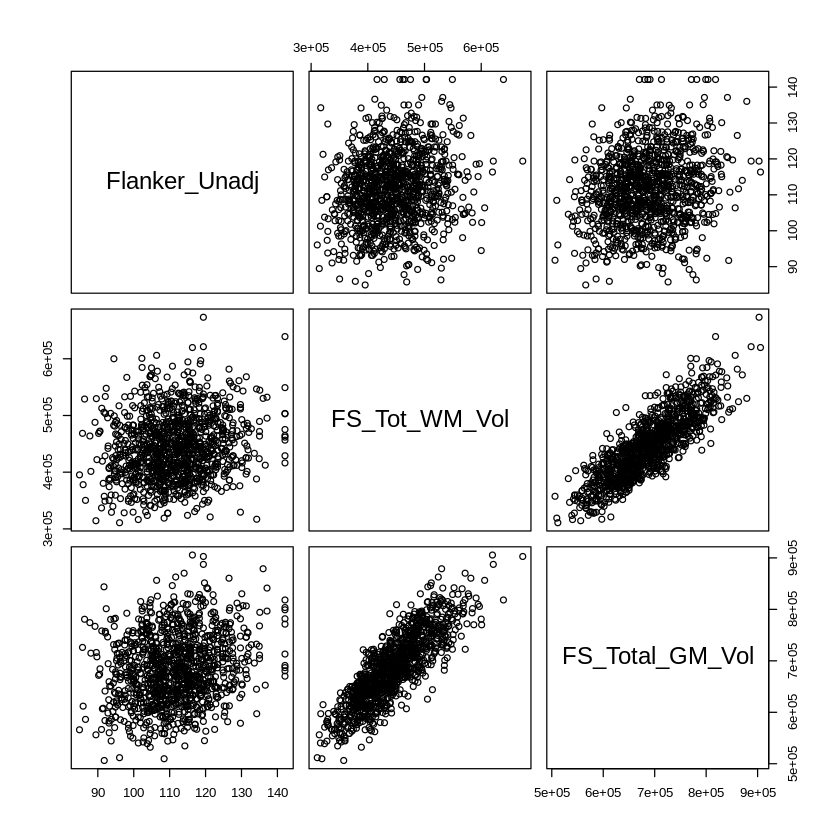

In [32]:
#INSERT CODE HERE

pairs(d1[c('Flanker_Unadj', 'FS_Tot_WM_Vol', 'FS_Total_GM_Vol')])
# Removed gender because it is categorical


> *Total white matter and total gray matter are strongly positively correlated based on the scatterplot above. However, Flanker Task performance appears to be unrelated or only slightly positively related to both total white and total gray matter.* 
> 

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [33]:
#INSERT CODE HERE
flanker_model <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(flanker_model)
coef(flanker_model)
confint(flanker_model)



Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
  (93 observations deleted due to missingness)
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *The mean coefficient value from the intercept (representing the Flanker score when gray matter is at 0) is 9.03e+01, CI [8.43e+01, 9.62e+01]. The mean coeffient value from B1 is 3.11e-05, CI [2.24e-05, 4.00e-05]. Gray matter is positively, significantly associated with Flanker task performance (p < .001), though it is notable that the coefficient is relatively small. * 
> 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 93 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 93 rows containing missing values (`geom_point()`).”


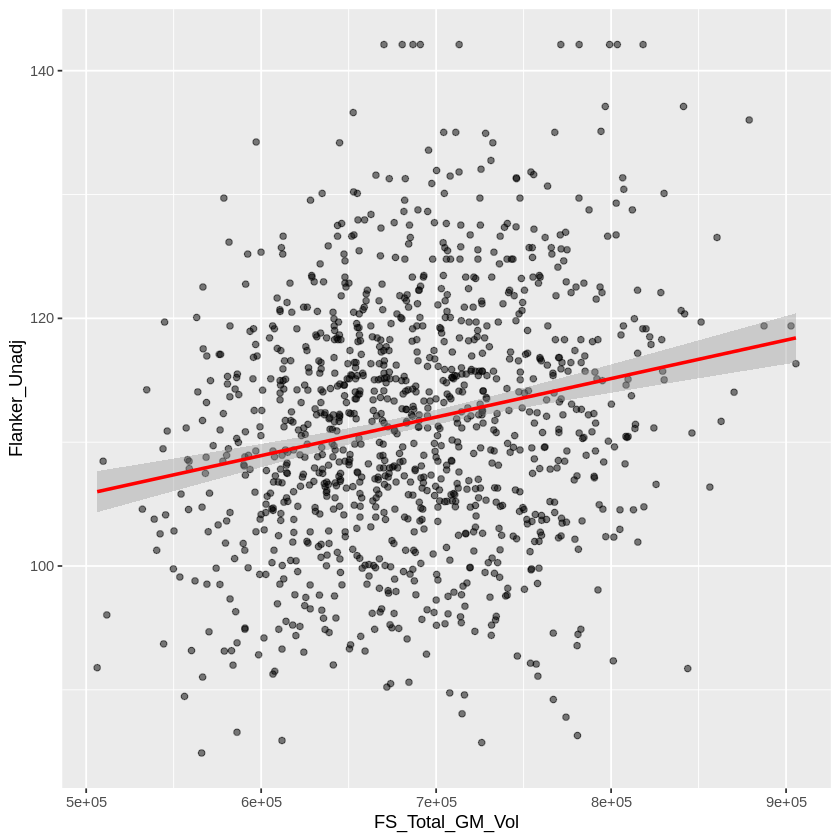

In [30]:
#INSERT CODE HERE
library('ggplot2')

ggplot(d1, aes(x=FS_Total_GM_Vol, y=Flanker_Unadj)) +
  geom_point(alpha=0.5) +
  geom_smooth(method='lm', color='red', se=T)


> *The graph shows a positive correlation between total gray matter volume and Flanker task performance. This relationship appears to be a relatively weak correlation, as the data points have wide ranges on the Flanker scores for each X value. However, the loess line and confidence intervals surrounding it display a positive trend.* 
> 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *There is a significant positive correlation between total gray matter volume and Flanker task performance (b=3.110e-05, SE=4.412e-06, p=3.18e-12).* 
> 

**DUE:** 5pm EST, February 27, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*